## Graficar log de NAMD

In [1]:
log_file = "/Users/alsalas/Desktop/SVCT2_2015/dm01_100ns.out"

In [10]:
with open(log_file, "r") as f:
    lineas = f.readlines()
    start = 0
    params = ["TS","BOND", "ANGLE","DIHED","IMPRP","ELECT","VDW",
              "BOUNDARY","MISC","KINETIC","TOTAL",
              "TEMP","POTENTIAL","TOTAL3","TEMPAVG","PRESSURE",
              "GPRESSURE","VOLUME","PRESSAVG","GPRESSAVG"]
    for i,l in enumerate(lineas):
        if l.startswith("ETITLE"):
            print lineas[i+2].split(" ")

['ENERGY:', '', '800000', '', '', '', '', '', '8774.2331', '', '', '', '', '43447.2544', '', '', '', '', '31044.2591', '', '', '', '', '', '', '627.8843', '', '', '', '', '', '', '', '-667655.4745', '', '', '', '', '28033.9489', '', '', '', '', '', '', '', '', '0.0000', '', '', '', '', '', '', '', '', '0.0000', '', '', '', '144817.6644', '', '', '', '', '', '', '', '-410910.2303', '', '', '', '', '', '', '310.5085', '', '', '-555727.8946', '', '', '-410102.6076', '', '', '', '', '', '', '310.4465', '', '', '', '', '', '', '', '', '', '', '', '-70.3932', '', '', '', '', '', '', '-52.5813', '', '', '2141515.1248', '', '', '', '', '', '', '', '', '1.0775', '', '', '', '', '', '', '', '', '1.1437\n']
['ENERGY:', '', '900000', '', '', '', '', '', '8741.8879', '', '', '', '', '43061.8679', '', '', '', '', '30662.1370', '', '', '', '', '', '', '622.8341', '', '', '', '', '', '', '', '-668098.7531', '', '', '', '', '28460.3054', '', '', '', '', '', '', '', '', '0.0000', '', '', '', '', '', '',

In [1]:
import MDAnalysis

In [2]:
PSF = "/Users/alsalas/Desktop/SVCT2_2015/prot_popcwi.psf"
DCD = "/Users/alsalas/Desktop/SVCT2_2015/prot_popcwi.dm-01.dcd"

In [3]:
u = MDAnalysis.Universe(PSF, DCD)
print(u)

<Universe with 220063 atoms and 169473 bonds>


In [4]:
len(u.trajectory)

1472

In [6]:
Rgyr = []
protein = u.selectAtoms("protein")
for ts in u.trajectory:
   Rgyr.append((u.trajectory.time, protein.radiusOfGyration()))
Rgyr = np.array(Rgyr)

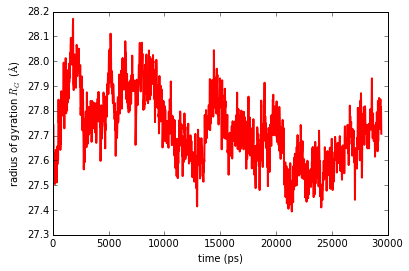

In [8]:
# quick plot
import matplotlib.pyplot as plt
ax = plt.subplot(111)
ax.plot(Rgyr[:,0], Rgyr[:,1], 'r', lw=2, label=r"$R_G$")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)")
ax.figure.savefig("Rgyr.pdf")
plt.draw()